In [1]:
import pipeline
import filepaths as fp

import torch
from rnn_model import EncoderRNN, AttnDecoderRNN
from rnn_model_train import trainIters
from rnn_model_predict import predict_all

In [2]:
def train_model(index_array_pairs, s_vocab_size, t_vocab_size, max_length):
    
    # create Encoder/Decoder models 
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    encoder = EncoderRNN(s_vocab_size, hidden_size).to(device)
    attn_decoder = AttnDecoderRNN(hidden_size, t_vocab_size, max_length, dropout_p).to(device)

    # train models and return losses to plot
    plot_every = n_iters/100.
    plot_losses = trainIters(
        index_array_pairs, encoder, attn_decoder, n_iters, max_length, 
        print_every=n_iters/25., plot_every = plot_every, 
        learning_rate = learning_rate, max_hours = max_hours)
    
    # return trained models and info to plot the losses
    return encoder, attn_decoder, plot_losses, plot_every


0m 2s (- 1m 9s) (60 4%) 3.2848
0m 6s (- 1m 14s) (120 8%) 3.3132
0m 9s (- 1m 12s) (180 12%) 3.3191
0m 13s (- 1m 10s) (240 16%) 3.2758
0m 17s (- 1m 10s) (300 20%) 3.0616
0m 21s (- 1m 7s) (360 24%) 2.9640
0m 24s (- 1m 3s) (420 28%) 2.9120
0m 28s (- 1m 0s) (480 32%) 2.6904
0m 32s (- 0m 57s) (540 36%) 2.6205
0m 35s (- 0m 53s) (600 40%) 2.3483
0m 39s (- 0m 50s) (660 44%) 2.2232
0m 42s (- 0m 46s) (720 48%) 2.3239
0m 46s (- 0m 42s) (780 52%) 1.7673
0m 49s (- 0m 39s) (840 56%) 1.6771
0m 53s (- 0m 35s) (900 60%) 1.3028
0m 57s (- 0m 32s) (960 64%) 1.0943
1m 1s (- 0m 28s) (1020 68%) 0.6326
1m 5s (- 0m 25s) (1080 72%) 0.5013
1m 8s (- 0m 21s) (1140 76%) 0.3309
1m 12s (- 0m 18s) (1200 80%) 0.1961
1m 16s (- 0m 14s) (1260 84%) 0.1237
1m 20s (- 0m 10s) (1320 88%) 0.0920
1m 24s (- 0m 7s) (1380 92%) 0.0820
1m 28s (- 0m 3s) (1440 96%) 0.0626
1m 32s (- 0m 0s) (1500 100%) 0.0562


<Figure size 432x288 with 0 Axes>

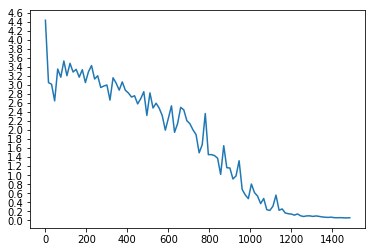

Losses diagram saved in TODO
Models saved in TODO

Predictions written to ../output/toy.preprocessed-test.predicted.en
Blue score written to ../output/toy.preprocessed-test.BLEU


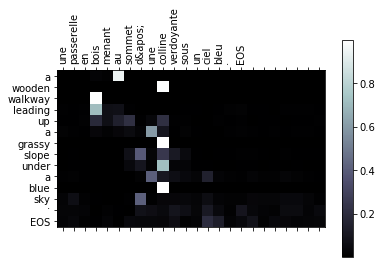

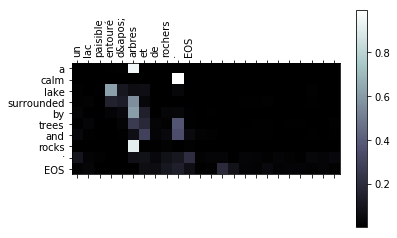

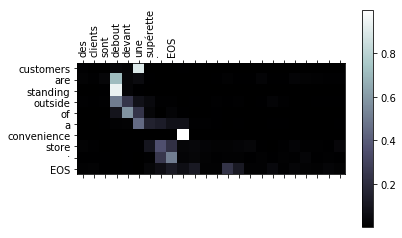

Attention diagrams saved in TODO


In [3]:
hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_iters = 1500
max_hours = 9


# MAX_LENGTH = 10
# (encoder, attn_decoder, slang, tlang) = pipeline.run(
#     fp.spath_toy, fp.tpath_toy, train_model, 
#     fp.spath_toy, fp.tpath_toy, predict_all, 
#     max_length = MAX_LENGTH, useCache = True)

MAX_LENGTH = 24
(encoder, attn_decoder, slang, tlang, plot_losses) = pipeline.run(
    fp.spath_toy, fp.tpath_toy, 
    fp.spath_toy, fp.tpath_toy, 
    train_model, predict_all, 
    max_length = MAX_LENGTH, 
    replace_unknown_words = False, useCache = False)


16m 5s (- 386m 5s) (4000 4%) 4.3758
32m 11s (- 370m 16s) (8000 8%) 3.9589
48m 25s (- 355m 7s) (12000 12%) 3.7703
65m 4s (- 341m 40s) (16000 16%) 3.6821
81m 48s (- 327m 12s) (20000 20%) 3.5748
98m 9s (- 310m 49s) (24000 24%) 3.5286
114m 39s (- 294m 50s) (28000 28%) 3.4589
131m 10s (- 278m 45s) (32000 32%) 3.4390
147m 42s (- 262m 36s) (36000 36%) 3.4058
164m 19s (- 246m 28s) (40000 40%) 3.3985
180m 47s (- 230m 5s) (44000 44%) 3.4582
197m 20s (- 213m 47s) (48000 48%) 3.4999
213m 46s (- 197m 19s) (52000 52%) 3.5866
230m 18s (- 180m 57s) (56000 56%) 3.6885
246m 36s (- 164m 24s) (60000 60%) 3.8922
262m 52s (- 147m 52s) (64000 64%) 4.0765
279m 30s (- 131m 32s) (68000 68%) 3.9496
296m 22s (- 115m 15s) (72000 72%) 3.8649
313m 23s (- 98m 57s) (76000 76%) 3.7708
330m 21s (- 82m 35s) (80000 80%) 3.7495
347m 17s (- 66m 9s) (84000 84%) 3.6865
364m 10s (- 49m 39s) (88000 88%) 3.6279
380m 35s (- 33m 5s) (92000 92%) 4.5629
397m 3s (- 16m 32s) (96000 96%) 4.4748
413m 39s (- 0m 0s) (100000 100%) 4.7609


<Figure size 432x288 with 0 Axes>

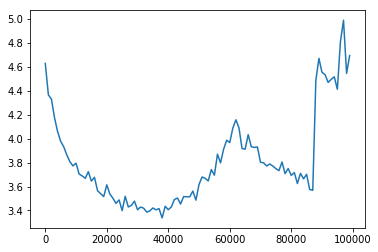

Losses diagram saved in TODO
Models saved in TODO

Predictions written to ../output/test_2017_flickr.preprocessed.predicted.en
Blue score written to ../output/test_2017_flickr.preprocessed.BLEU


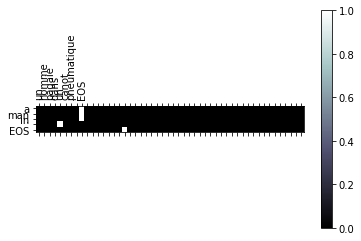

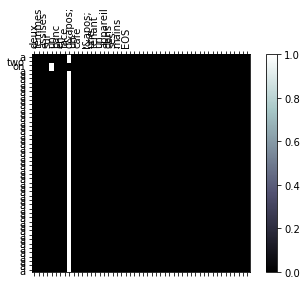

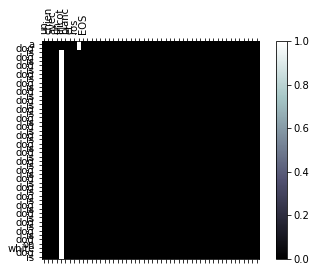

Attention diagrams saved in TODO


In [3]:
hidden_size = 256 
dropout_p = 0.1
learning_rate = 0.01
n_iters = 100000
max_hours = 10


# MAX_LENGTH = 10
# (encoder, attn_decoder, slang, tlang) = pipeline.run(
#     fp.spath_toy, fp.tpath_toy, train_model, 
#     fp.spath_toy, fp.tpath_toy, predict_all, 
#     max_length = MAX_LENGTH, useCache = True)

MAX_LENGTH = 50
(encoder, attn_decoder, slang, tlang, plot_losses) = pipeline.run(
    fp.spath_train, fp.tpath_train, 
    fp.spath_test, fp.tpath_test, 
    train_model, predict_all, 
    max_length = MAX_LENGTH, 
    replace_unknown_words = True, useCache = False)
